In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found  
Base.classes.keys()


['measurement', 'station']

In [8]:
# Save references of each table
# Map the measurement Class
measurement = Base.classes.measurement
# Map the Station Class
station = Base.classes.station



In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)


In [10]:
#query example pd.read_sql('select count(*) from measurement where date between "2016-08-23" and "2017-08-231"',engine)

In [11]:
#  query examples pd.read_sql('select prcp,date from measurement where date between "2016-08-23" and "2017-08-23"',engine)

# Exploratory Climate Analysis

## Precipitation Analysis

In [29]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

#first obtain the last date entry to use it in the query of the data 
last_date=session.query(measurement.date).order_by(measurement.date.desc()).first()
last_date
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
data_precipitation=session.query(measurement.date,measurement.prcp).filter(measurement.date>= '2016-08-23').filter(measurement.date<='2017-08-23').all()
data_precipitation
# Save the query results as a Pandas DataFrame and set the index to the date column
all_precipitation_df = pd.DataFrame(data_precipitation, columns = ['date', 'precipitation'])
all_precipitation_df.set_index('date', inplace = True)
all_precipitation_df


,precipitation
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [13]:
# Sort the dataframe by date  
all_precipitation_df = all_precipitation_df.sort_values(by='date')
all_precipitation_df.head()

,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


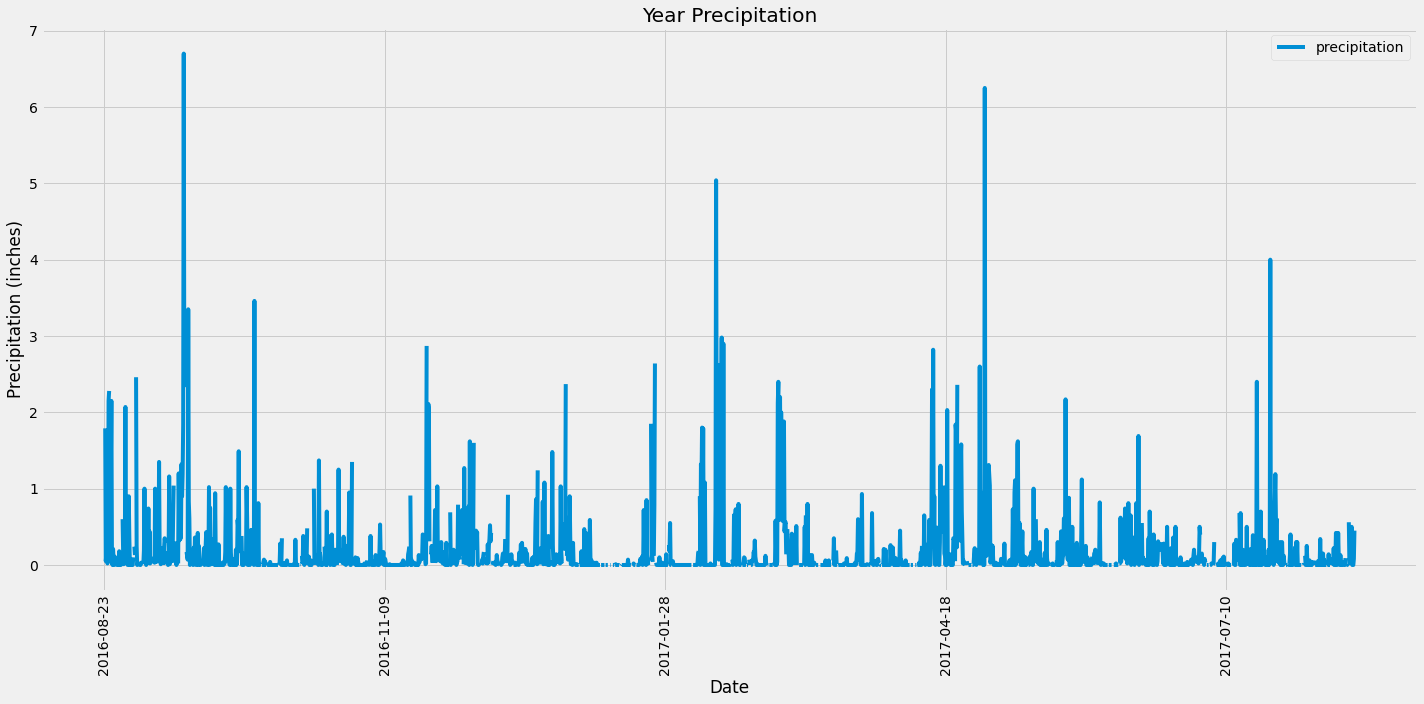

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize = (20, 10))
all_precipitation_df.plot(ax = ax, x_compat = True)
# title and labels
ax.set_xlabel("Date")
ax.set_ylabel("Precipitation (inches)")
ax.set_title("Year Precipitation")
#labels years
plt.xticks(rotation=90)
# save plot as image 
plt.savefig("Images/Yearly_Precipitation.png")
# plot
plt.tight_layout()
plt.show()

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
#describe to obtain all the statistics
all_precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

In [16]:
# Design a query to show how many stations are available in this dataset?
all_stations=session.query(station.id).count()
all_stations

9

In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
all_active_stations = (session.query(measurement.station, func.count(measurement.station))
                        .group_by(measurement.station)
                        .order_by(func.count(measurement.station).desc())
                        .all())
all_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
#('USC00519281', 2772)
the_most_active_station ='USC00519281'
temperatures_records = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
            filter(measurement.station == the_most_active_station).all()
temperatures_records

[(54.0, 85.0, 71.66378066378067)]

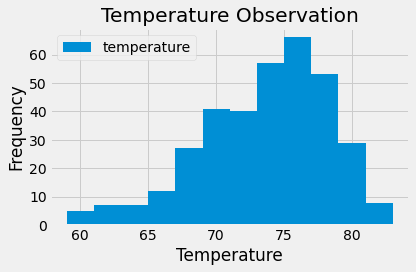

In [19]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# the_most_active_station ='USC00519281'
observation_data_temp = session.query(measurement.date, measurement.tobs).filter(measurement.station ==the_most_active_station).\
    filter(measurement.date>= '2016-08-23').all()
observation_data_temp

#DataFrame
observation_data_temp_df = pd.DataFrame(observation_data_temp, columns=['date', 'temperature'])

#Plot as a Histogram
fig, ax = plt.subplots()
observation_data_temp_df.plot.hist(bins = 12, ax=ax)
#labels
ax.set_xlabel("Temperature")
ax.set_ylabel("Frequency")
ax.set_title("Temperature Observation")
#save figure
plt.savefig("Images/Temperature_observation.png")
#plot
plt.tight_layout()
plt.show()

## Bonus Challenge Assignment

In [20]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [21]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
# using example dates
temp_records_dates = calc_temps('2011-02-28','2011-03-05')
temp_records_dates
#TMIN, TAVE, and TMAX  ****check

[(61.0, 69.75510204081633, 75.0)]

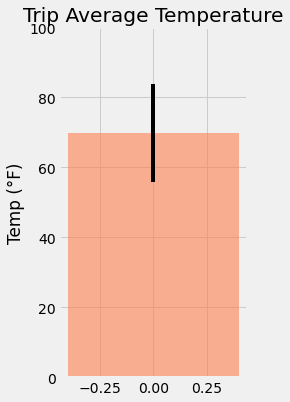

In [22]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
min_temp = temp_records_dates[0][0]
avg_temp = temp_records_dates[0][1]
max_temp = temp_records_dates[0][2]
#min,max
min_error = avg_temp - min_temp
max_error = max_temp - avg_temp
# 
plt.figure(figsize=(3,6))
plt.bar(0, avg_temp, yerr=[max_temp-min_temp], color = 'coral', alpha=.6)
plt.title('Trip Average Temperature')
plt.ylim(0,100)
plt.ylabel('Temp (°F)')
#plt.xticks([])
#save figure
plt.savefig("Images/Trip_Avg_Temperature.png")
# show plot
plt.show()

In [31]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
# temp_records_dates = calc_temps('2011-02-28','2011-03-05')
start_date = '2011-02-28'
end_date = '2011-03-05'

weather_station = session.query(station.station,
                  func.sum(measurement.prcp),
                  station.name,
                  station.elevation,                                    
                  station.latitude,
                  station.longitude)\
.filter(measurement.station == station.station)\
.filter(measurement.date >= start_date)\
.filter(measurement.date <= end_date)\
.group_by(station.station)\
.order_by(func.sum(measurement.prcp).desc())

for row in weather_station:
    print (f"Station:  {row[0]}\n    Rainfall: {row[1]}  \n    Location:  {row[2]}\n    Elevation:  {row[3]}  \
    Latitude:  {row[4]}  Longitude:  {row[5]}")
    print()


Station:  USC00518838
    Rainfall: 2.33  
    Location:  UPPER WAHIAWA 874.3, HI US
    Elevation:  306.6      Latitude:  21.4992  Longitude:  -158.0111

Station:  USC00519281
    Rainfall: 2.23  
    Location:  WAIHEE 837.5, HI US
    Elevation:  32.9      Latitude:  21.45167  Longitude:  -157.84888999999998

Station:  USC00519523
    Rainfall: 2.19  
    Location:  WAIMANALO EXPERIMENTAL FARM, HI US
    Elevation:  19.5      Latitude:  21.33556  Longitude:  -157.71139

Station:  USC00514830
    Rainfall: 1.96  
    Location:  KUALOA RANCH HEADQUARTERS 886.9, HI US
    Elevation:  7.0      Latitude:  21.5213  Longitude:  -157.8374

Station:  USC00516128
    Rainfall: 1.45  
    Location:  MANOA LYON ARBO 785.2, HI US
    Elevation:  152.4      Latitude:  21.3331  Longitude:  -157.8025

Station:  USC00513117
    Rainfall: 1.44  
    Location:  KANEOHE 838.1, HI US
    Elevation:  14.6      Latitude:  21.4234  Longitude:  -157.8015

Station:  USC00519397
    Rainfall: 1.38  
    Locati

In [24]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [25]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [26]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [27]:
# Plot the daily normals as an area plot with `stacked=False`
